# PROJECT 6

### <span style="color:dark green">Analysez les ventes d'une librairie avec Python

# <span style="color:dark green">Problématique</span>

1.Exploration des données.

2.Nettoyage des données.

3.Analyses des différents indicateurs de vente (Demande d'Antoine)

4.Comportement de nos clients en ligne (Demande de Julie)

# <span style="color:dark green"> SYNTHÈSE</span>

Après 2 ans d'ouvrir un site de ventes en ligne, la librairie Lapage; nous allons vérifier, en tant que Data analyst, s'il existe un lien entre le sexe des clients et les catégories de produits achetés, l'âge et le montant total des achats, la fréquence d'achat ou encore la taille du panier moyen..


## <span style="color:dark green">Librairies


Les librairies utilisées dans ce document sont :

In [3]:
# # Traitement des données
# # ==============================================================================
import pandas as pd
import numpy as np

# # Graphiques
# # ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# # Fonctions statistiques
# # ==============================================================================
import scipy.stats as st
import math as mth

In [4]:
# # # Paramètres graphiques
# # # ==============================================================================
# plt.style.use('ggplot')
# plt.rcParams['figure.figsize'] = [14, 7]
# plt.rcParams['font.size'] = 16

Les données utilisées dans ce document sont: customers, products et transactions.

Les données sont fournies par l'équipe marketing de la Librairie Lapage.

In [5]:
df_customers = pd.read_csv(r"C:\Users\s\Desktop\P_6\DAN-P6-donnees\customers.csv")
df_products = pd.read_csv(r"C:\Users\s\Desktop\P_6\DAN-P6-donnees\products.csv")
df_transactions = pd.read_csv(r"C:\Users\s\Desktop\P_6\DAN-P6-donnees\transactions.csv")


> ## <span style="color:dark green">1 Exploration des données 

In [6]:
# # Visualisation rapide de nos 3 dataframes
# # ==============================================================================
print(df_products.info())
print("----")
print(df_customers.info())
print("----")
print(df_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  o

> # <span style="color:dark green">2 Nettoyage des données

>> ## <span style="color:dark green">2.1 Traitement des valeurs manquantes

In [7]:
# # Méthode .isnull() (ou .isna())sur les données produits, renvoi de booléens par colonne
# # ==============================================================================
df_products.isnull().any()

id_prod    False
price      False
categ      False
dtype: bool

Aucune valeur manquante dans df_products

In [8]:
# # Méthode .isnull() sur les données clients, renvoi de booléens par colonne
# # ==============================================================================
df_customers.isnull().any()

client_id    False
sex          False
birth        False
dtype: bool

Aucune valeur manquante dans df_customers.

In [9]:
# # Méthode .isnull() sur les données transactions, renvoi de booléens par colonne
# # ==============================================================================
df_transactions.isnull().any()

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool

Aucune valeur manquante dans df_transactions.

>>## <span style="color:dark green">2.2 Traitement des valeurs aberrantes et atypiques

* Par valeur aberrante, on s'attend à identifier des valeurs vraisemblablement fausses, et pour les valeurs atypiques elles restent possibles, pas forcément fausses.

>>>### <span style="color:dark green">2.2.1 Analyse et correction éventuelle du dataframe df_products

In [10]:
# # Tri rapide sur les 5 premières lignes du dataframe df_product (méthode .sort_values())
# # ==============================================================================
df_products.sort_values('id_prod', ascending = False).head()

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2


In [11]:
# # Tri rapide sur les 5 dernières lignes du dataframe df_products
# # ==============================================================================
df_products.sort_values('id_prod', ascending = False).tail()

,id_prod,price,categ
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0
1001,0_0,3.75,0


Ligne index 731 id_prod T_0 et price ne sont pas acceptables (valeur test négative).

In [12]:
# # Vérification par restriction des valeurs négatives (ou nulles) dans df_products
# # ==============================================================================
df_products[df_products.price <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


In [13]:
# # Suppression de la ligne index 731, la valeur n'a aucune signification logique
# # ==============================================================================
df_products = df_products[df_products.id_prod != 'T_0']

La liste des produits vendus recense une seule valeur négative (- 1€) très certainement liée à une transaction de test.

In [14]:
# # Vérification rapide de la cohérence des prix produits
# # ==============================================================================
print(df_products.price.min())
print(df_products.price.max())

0.62
300.0


Aucune anomalie sur les prix min. et max., les prix produits en queue de distribution sont plausibles.

>>>### <span style="color:dark green">2.2.2 Analyse et correction éventuelle du dataframe df_customers

In [16]:
# # Tri rapide sur les 5 premières lignes du dataframe df_customers (méthode .sort_values())
# # ==============================================================================
df_customers.sort_values('client_id', ascending = False).head()

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


In [17]:
# # Tri rapide sur les 5 dernières lignes du dataframe df_customers
# # ==============================================================================
df_customers.sort_values('client_id', ascending = False).tail()

,client_id,sex,birth
3426,c_1001,m,1982
8472,c_1000,f,1966
2137,c_100,m,1992
6894,c_10,m,1956
4299,c_1,m,1955


client_id, ct_1 et ct_2 semblent ne pas avoir la même forme d'écriture, le "ct" ressemble à un identifiant de test  

In [18]:
# # Suppression des deux lignes client_id ct_1 et ct_2
# # ==============================================================================
df_customers = df_customers[(df_customers.client_id != 'ct_0') & (df_customers.client_id != 'ct_1')]

In [19]:
# # Vérification rapide de la cohérence des âges clients
# # ==============================================================================
print(df_customers.sort_values(by='birth', ascending=False).head())
print(df_customers.sort_values(by='birth', ascending=True).head())

     client_id sex  birth
7078    c_8245   f   2004
6330    c_2854   m   2004
445     c_2627   m   2004
1787    c_7916   f   2004
2947     c_308   f   2004
     client_id sex  birth
4569     c_577   m   1929
2491    c_8362   f   1929
418     c_5302   m   1929
1086    c_3218   f   1930
5138    c_7232   f   1930


Les plus jeunes clients ont 18 ans, les plus âgés 93 ans. Aucune anomalie.

>>>### <span style="color:dark green">2.2.3 Analyse et correction éventuelle du dataframe df_transactions

In [20]:
# # Tri rapide sur les 5 premières lignes du dataframe df_transactions (méthode .sort_values())
# # ==============================================================================
df_transactions.sort_values('client_id', ascending = False).head

<bound method NDFrame.head of        id_prod                             date session_id client_id
638483     T_0  test_2021-03-01 02:30:02.237444        s_0      ct_1
589180     T_0  test_2021-03-01 02:30:02.237443        s_0      ct_1
338563     T_0  test_2021-03-01 02:30:02.237433        s_0      ct_1
245235     T_0  test_2021-03-01 02:30:02.237415        s_0      ct_1
525297     T_0  test_2021-03-01 02:30:02.237418        s_0      ct_1
...        ...                              ...        ...       ...
673656  0_2277       2021-09-06 18:34:16.975976    s_85977       c_1
620939   1_425       2021-12-25 03:53:43.623598   s_139610       c_1
72185   0_2277       2022-10-06 18:34:16.975976   s_278688       c_1
488625   0_513       2022-12-21 22:41:38.769525   s_315508       c_1
318987  0_1880       2021-11-04 18:37:01.482109   s_114737       c_1

[679532 rows x 4 columns]>

In [21]:
# # Tri rapide sur les 5 dernières lignes du dataframe df_transactions
# # ==============================================================================
df_transactions.sort_values('client_id', ascending = False).tail()

,id_prod,date,session_id,client_id
673656,0_2277,2021-09-06 18:34:16.975976,s_85977,c_1
620939,1_425,2021-12-25 03:53:43.623598,s_139610,c_1
72185,0_2277,2022-10-06 18:34:16.975976,s_278688,c_1
488625,0_513,2022-12-21 22:41:38.769525,s_315508,c_1
318987,0_1880,2021-11-04 18:37:01.482109,s_114737,c_1


Identification de nouvelles valeurs "test".

Valeurs directement liées aux client_id ct_1 et ct_2 identifiées précédemment.

In [22]:
#Suppression des valeurs test
# # ==============================================================================
df_transactions = df_transactions[df_transactions.id_prod != 'T_0']

In [23]:
#Conversion des valeurs de la colonne 'date' dans le bon format date (méthode .to_datetime())
# # ==============================================================================
df_transactions['date'] = pd.to_datetime(df_transactions.date, format='%Y-%m-%d %H:%M:%S', errors = 'coerce')

In [24]:
#L'argument "errors = 'coerce'" de la méthode renvoie (NaT) si la conversion n'est pas possible

#Vérification des éventuelles valeurs manquantes
# # ==============================================================================
df_transactions.date.isnull().sum()

0

>>## <span style="color:dark green">2.3 Traitement des éventuels doublons

In [25]:
#Méthode .duplicated() pour identifier la présence de doublons
# # ==============================================================================
print(df_products.duplicated().sum())
print(df_customers.duplicated().sum())
print(df_transactions.duplicated().sum())

0
0
0


Aucun doublon détecté dans nos 3 dataframes.

En conclusion, à ce stade de l'analyse, seules des valeurs dites "test" ont été supprimées pour ne pas fausser l'étude. Il n'y a pas vraiment de valeurs atypiques, les prix en queue de distribution restent cohérents, ainsi que les clients les plus âgés.

> # <span style="color:dark green">3 Analyses des différents indicateurs de vente (demandé par Antoine)
    
    

>> ## <span style="color:dark green">3.1 Préparation des données transactionnelles produits

In [26]:
#Jointure pour agréger les valeurs 'transactions' avec celles 'products' (méthode .merge())
# # ==============================================================================
df_transactions_products = pd.merge(df_transactions, df_products, on='id_prod', how='left')
df_transactions_products.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [27]:
#Aucun id produit manquant, il est intéressant de détecter le ou les produits concernés par les valeurs manquantes

#Création d'un dataframe ciblant uniquement ces NaN
# # ==============================================================================
df_missing_values = df_transactions_products[df_transactions_products.categ.isnull() == True]

In [28]:
#Recherche d'ou des produits concernés
# # ==============================================================================
df_missing_values.id_prod.unique()

array(['0_2245'], dtype=object)

Seul le produit id 0_2245 est concerné par les valeurs manquantes


In [29]:
#Exactement 103 lignes non exploitables dans l'état pour le produit id 0_2245

#Il est préférable de les conserver en remplacant les prix NaN par le prix moyen
# # ==============================================================================
df_transactions_products['price'] = df_transactions_products.price.fillna(df_transactions_products.price.mean())

In [30]:
#Le produit id 0_2245 doit-être classifié en catégorie 0, il commence par "0_"

#Méthode .fillna() pour remplacer les NaN de la variable catégorie par 0
# # ==============================================================================
df_transactions_products['categ'] = df_transactions_products.categ.fillna(0)

In [31]:
#22 individus restants sans date, sans session_id et sans client_id
#Il n'y pas de solution immédiate pour pouvoir obtenir des indications sur la date, la session…
#Il est préférable de les supprimer pour les exclure de l'analyse
# # ==============================================================================
df_transactions_products[df_transactions_products.date.isnull() == True]

,id_prod,date,session_id,client_id,price,categ


In [32]:
#Suppression des 22 dernières lignes avec valeurs manquantes (celles affichées ci-dessus)
# # ==============================================================================
df_transactions_products = df_transactions_products.dropna()

In [33]:
#Nouvelle vérification des valeurs manquantes, normalement les catégories sont désormais sans NaN
# # ==============================================================================
df_transactions_products.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

>> ## <span style="color:dark green">3.2 Analyse de l'évolution du chiffre d'affaires

>>> ### <span style="color:dark green">3.2.1 C.A mensuelle

In [34]:
#Agrégation des données transactionnelles par fréquence mensuelle (méthode .groupby())
# # ==============================================================================
df_transactions_months = df_transactions_products.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

df_transactions_months['ventes_keuros'] = df_transactions_months.price / 1000
df_transactions_months = df_transactions_months[['date', 'ventes_keuros']]
df_transactions_months

,date,ventes_keuros
0,2021-03-31,482.597703
1,2021-04-30,476.353667
2,2021-05-31,493.083108
3,2021-06-30,484.210743
4,2021-07-31,482.905219
5,2021-08-31,482.441883
6,2021-09-30,507.450137
7,2021-10-31,320.920923
8,2021-11-30,516.342278
9,2021-12-31,526.039463


>>> ### <span style="color:dark green">3.2.2 Évolution des ventes

In [35]:
# Vérification de l'index
# # ==============================================================================
df_transactions_months.index

RangeIndex(start=0, stop=24, step=1)

In [36]:
# Définir un nouveau type d'index (Date)
# # ==============================================================================
df_transactions_months=df_transactions_months.set_index('date')
df_transactions_months.head()

,ventes_keuros
date,
2021-03-31,482.597703
2021-04-30,476.353667
2021-05-31,493.083108
2021-06-30,484.210743
2021-07-31,482.905219


In [37]:
df_transactions_months.index

DatetimeIndex(['2021-03-31', '2021-04-30', '2021-05-31', '2021-06-30',
               '2021-07-31', '2021-08-31', '2021-09-30', '2021-10-31',
               '2021-11-30', '2021-12-31', '2022-01-31', '2022-02-28',
               '2022-03-31', '2022-04-30', '2022-05-31', '2022-06-30',
               '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
               '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28'],
              dtype='datetime64[ns]', name='date', freq=None)

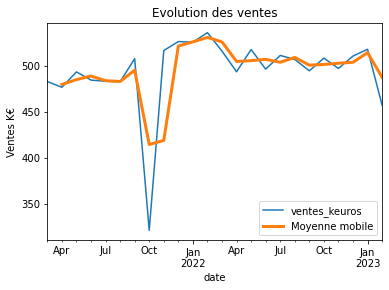

In [53]:
#Visualisation de l'évolution des ventes 'Moyenne mobile'
# # ==============================================================================
df_transactions_months['ventes_keuros']['2021':'2023'].plot()
df_transactions_months['ventes_keuros']['2021':'2023'].rolling(window=2).mean().plot(label='Moyenne mobile', lw=3)

plt.legend()
plt.title('Evolution des ventes')
plt.ylabel('Ventes K€')

plt.show()

Une baisse d'activité significative est enregistrée sur le mois d'octobre.

In [54]:
#Restriction selon les dates du mois d'octobre
# # ==============================================================================
transaction_october = len(df_transactions_products[(df_transactions_products.date > '2021-09-30') & \
                                                   (df_transactions_products.date < '2021-11-01')])
transaction_october

22917

In [55]:
#Restriction selon les dates du mois de septembre
# # ==============================================================================
transaction_september = len(df_transactions_products[(df_transactions_products.date > '2021-08-31') & \
                                                     (df_transactions_products.date < '2021-10-01')])
transaction_september

34148

In [56]:
taux_evol_oct = (transaction_october - transaction_september) / transaction_september
taux_evol_oct

print(f"Taux d'évolution (ca) de sept. à oct.: {taux_evol_oct*100:.0f}%")

Taux d'évolution (ca) de sept. à oct.: -33%


Vu le taux d'évolution entre septembre et octobre 2021, il semble manquer des valeurs sur le mois d'octobre. La visualisation le montre, et le nombre de lignes identifiées sur la période semble le confirmer également. Une vérification supplémentaire est nécessaire.

In [57]:
#Restriction par catégorie pour identifier les valeurs manquantes sur le mois d'octobre
# # ==============================================================================
df_transactions_products[(df_transactions_products.categ == 1) & (df_transactions_products.date > '2021-10-02') & \
                                                   (df_transactions_products.date < '2021-10-28')]

,id_prod,date,session_id,client_id,price,categ


Aucune transaction sur les produits de catégorie 1 durant le mois d'octobre.

Pour la suite de l'étude le mois d'octobre ne sera pas pris en compte, l'analyse se fera sur 11 mois au lieu de 12.

In [58]:
#Création (par restriction des dates)du dataframe 'df_transactionsv1' excluant les transactions du mois d'octobre
# # ==============================================================================
df_transactionsv1 =  df_transactions[(df_transactions.date <= '2021-09-30') | (df_transactions.date >= '2021-11-01')]

In [59]:
#Nouvelle jointure pour agréger les valeurs 'transactionsv1' avec celles 'products' (méthode .merge())
# # ==============================================================================
df_transactionsv1_products = pd.merge(df_transactionsv1, df_products, on='id_prod')
df_transactionsv1_products.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0
1,0_1518,2021-09-26 12:37:29.780414,s_95811,c_6197,4.18,0
2,0_1518,2021-05-06 17:14:43.117440,s_30782,c_682,4.18,0
3,0_1518,2022-03-16 18:57:10.420103,s_180057,c_5932,4.18,0
4,0_1518,2022-11-12 18:58:10.574853,s_296584,c_7217,4.18,0


Pour la suite de l'étude les dataframes df_transactionsv1_products et df_transactionsv1 seront utilisés.

>>> ### <span style="color:dark green">3.2.3 Proportion des transactions entre professionnels et particuliers

Pour enrichir l'analyse, on crée quelques variables additionnelles, comme :

* le mois de la transaction
* le nombre de produits achetés par client chaque mois (la fréquence d'achats)
* le nombre de ventes total par client sur l'année entière
* le panier moyen,
* la taille du panier moyen pour chaque client
* le chiffre d'affaires total par client sur l'année

In [60]:
# Mois de la transaction
# # ==============================================================================
# Mois, de 1 à 12
df_transactionsv1_products['mois'] = pd.DatetimeIndex(df_transactionsv1_products['date']).month 
df_transactionsv1_products.sample()

# Variable temporaire de date fixe (jour)
df_transactionsv1_products['date_fixe'] = df_transactionsv1_products['date'].dt.date 

df_transactionsv1_products= df_transactionsv1_products.merge(
    df_transactionsv1_products.groupby('client_id').count()['date'].reset_index().rename(columns={'date': 'total_ventes'}),
    how='left', on='client_id')
df_transactionsv1_products.sample(3)

df_transactionsv1_products['ventes_mensuelles'] = round(df_transactionsv1_products['total_ventes'] / 11)
df_transactionsv1_products.sample()

df_transactionsv1_products = df_transactionsv1_products.merge(
    df_transactionsv1_products.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price', 
        aggfunc='count').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'taille_panier_moyen'}), 
    on='client_id', how='left')

df_transactionsv1_products = df_transactionsv1_products.merge(
    df_transactionsv1_products.pivot_table(
        index=['client_id', 'date_fixe'], 
        values='price').reset_index().pivot_table(
        index='client_id').reset_index().rename(
        columns={'price': 'panier_moyen'}), 
    on='client_id', how='left').drop('date_fixe', axis=1)


df_transactionsv1_products = df_transactionsv1_products.merge(
    df_transactionsv1_products.pivot_table(
    index='client_id', values='price', 
    aggfunc='sum').reset_index().rename(
    columns={'price': 'total_achats'}),
    on='client_id', how='left')
df_transactionsv1_products.sample(3)

,id_prod,date,session_id,client_id,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats
81613,1_362,2022-01-11 15:56:41.423617,s_148304,c_854,11.25,1,1,147,13.0,2.491525,11.285743,1594.79
395308,1_385,2022-09-19 19:19:09.535342,s_270493,c_1609,25.99,1,9,24427,2221.0,34.995702,12.771949,312247.61
534433,0_1578,2021-03-09 07:17:29.408425,s_3824,c_2224,17.79,0,3,87,8.0,2.718750,13.242344,1119.49


En triant les clients par chiffre d'affaires annuel, **4 clients se détachent**. Leur nombre d'achats est anormalement plus élevé que celui des autres clients : on a sûrement affaire à des clients professionels.

In [61]:
# Les 10 clients aux plus gros chiffres d'affaires annuels
# # ==============================================================================
ca_annuel = df_transactionsv1_products.pivot_table(
     index='client_id', values=[
         'total_achats','ventes_mensuelles','taille_panier_moyen','total_ventes','panier_moyen']
     ).sort_values(by='total_achats', ascending=False).reset_index()

ca_annuel.head(10) 

,client_id,panier_moyen,taille_panier_moyen,total_achats,total_ventes,ventes_mensuelles
0,c_1609,12.771949,34.995702,312247.61,24427,2221.0
1,c_4958,55.443063,7.327089,282289.70,5085,462.0
2,c_6714,16.853361,13.187221,149484.49,8875,807.0
3,c_3454,16.684837,9.488539,111638.84,6623,602.0
4,c_2899,55.754703,1.640625,5214.05,105,10.0
5,c_1570,14.995217,2.676692,5136.14,356,32.0
6,c_3263,13.237727,3.015385,5129.89,392,36.0
7,c_7319,13.468139,2.744361,5078.48,365,33.0
8,c_8026,13.771828,2.844961,4969.41,367,33.0
9,c_5263,59.497734,1.500000,4964.87,96,9.0


Le poids de ces 4 individus risquant d'impacter l'analyse sur des variables comme le sexe ou l'âge, **on distinguera les clients professionnels des particuliers**.

In [132]:
# Création d'une variable 'Type' de client (2 modalités : particulier ou professionnel)
# # ==============================================================================
df_transactionsv1_products['client_type'] = 'B2C'
df_transactionsv1_products['client_type'].loc[df_transactionsv1_products[df_transactionsv1_products['client_id'].isin(ca_annuel.head(4)['client_id'])].index] = 'B2B'

# Création de 2 dataframe
# # ==============================================================================
b2b = df_transactionsv1_products[df_transactionsv1_products['client_type']=='B2B']
b2c = df_transactionsv1_products[df_transactionsv1_products['client_type']=='B2C']

df_transactionsv1_products.sample(3)

C:\Users\s\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id_prod,date,session_id,client_id,price,categ,mois,total_ventes,ventes_mensuelles,taille_panier_moyen,panier_moyen,total_achats,client_type
228367,0_1212,2021-09-24 15:40:39.135404,s_94821,c_1422,6.31,0,9,362,33.0,2.919355,13.891385,4878.25,B2C
478880,2_104,2022-11-08 23:14:00.040888,s_294808,c_7272,43.35,2,11,32,3.0,1.066667,41.804667,1345.38,B2C
547147,0_1293,2022-01-22 13:10:16.168231,s_153530,c_2379,11.99,0,1,93,8.0,2.906250,13.936976,1340.33,B2C


Text(0.5, 1.0, 'Volume des transactions par type de client')

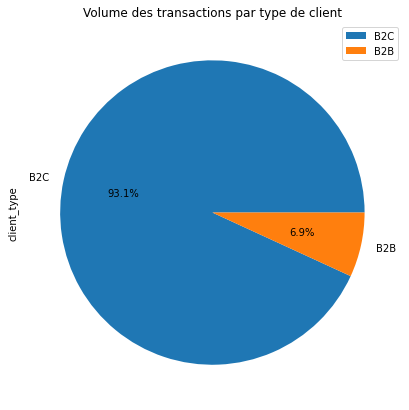

In [133]:
# Visualisation de la proportion des transactions entre professionnels et particuliers
# # ==============================================================================
plt.figure(figsize=(14, 7))
df_transactionsv1_products['client_type'].value_counts(normalize=True).plot(
    kind='pie',
    legend=True,
    autopct='%1.1f%%')
plt.title('Volume des transactions par type de client')

>> ## <span style="color:dark green">3.3 Analyser la tendance globale: variable 'price' (df_transactionsv1_products)

* Mesures de tendance centrale et dispersion des prix produits (toutes catégories confondues)

In [65]:
#Calcul de la Moyenne des prix produits vendus 
# # ==============================================================================
round(df_transactionsv1_products['price'].mean(), 2)

17.55

In [66]:
#Calcul de la Mediane des prix produits vendus
# # ==============================================================================
df_transactionsv1_products['price'].median()

13.99

In [67]:
#Calcul du Mode des prix produits vendus
# # ==============================================================================
df_transactionsv1_products['price'].mode()

0    15.99
dtype: float64

In [68]:
#Calcul de la Variance des prix produits vendus
# # ==============================================================================
round(df_transactionsv1_products['price'].var(ddof=0), 2)

336.82

In [69]:
#Calcul de l'écart type des prix produits vendus
# # ==============================================================================
round(df_transactionsv1_products['price'].std(ddof=0), 2)

18.35

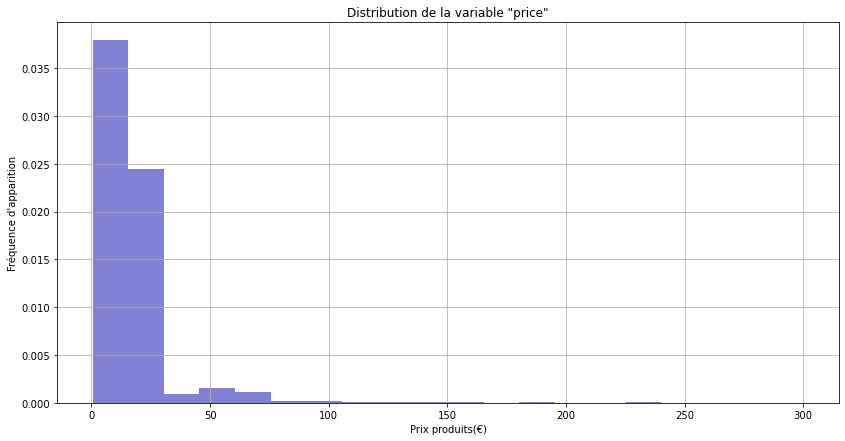

In [134]:
#Visualisation (Histogramme)de la distribution des prix produits
# # ==============================================================================
df_transactionsv1_products['price'].hist(color='#0504aa', alpha=0.5, density=True, bins=20, figsize=(14, 7))

plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits(€)')
plt.ylabel('Fréquence d\'apparition')

plt.show()

* La distribution de prix avec un pic autour entre 0,62€ et 15€ et un autre autour entre 15€ et 30€.
* Les prix ont varié entre 0,62€ et 300€.
* Plus bas nous verrons la distribution des prix produits par catégorie.

>>>### <span style="color:dark green">3.3.1 Mesure de concentration des prix produits (toutes catégories confondues)

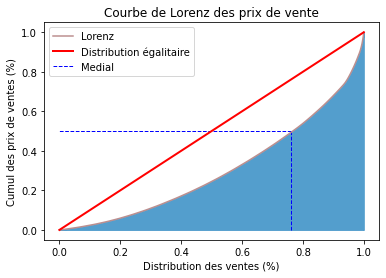

In [71]:
#Courbe de Lorenz sur la variables des prix
# # ==============================================================================
price = df_transactionsv1_products['price'].values

#Sélection du sous-échantillon de travail que l'on appelle price
#On place les observations dans une variable
# # ==============================================================================
lorenz_price = np.cumsum(np.sort(price)) / price.sum()

#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
# # ==============================================================================
plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")

plt.show()


On constate que **76%** des ventes représentent **50%** du montant total des prix de vente. 

Ce n'est pas une égalité totale, mais acceptable dans notre contexte business.

In [72]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
# # ==============================================================================
aire_ss_courbe_price = lorenz_price[:-1].sum()/len(lorenz_price) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
# # ==============================================================================
S = 0.5 - aire_ss_courbe_price 
gini_price = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_price))

L'indice de Gini est égal à 0.39


Confirmation avec l'indice de Gini plus proche de 0 que de 1, les prix pratiqués ont tendance à être **équitables**.

>> ## <span style="color:dark green">3.4 Analyse sectorielle de l'activité : La répartition par catégorie (df_transactionsv1_products)

In [73]:
#Représentation des effectifs par catégories de vente(méthode .value_counts())
# # ==============================================================================

#l'index de 'effectifs' contient les modalités
effectif = df_transactionsv1_products['categ'].value_counts()
modalite = effectif.index 

#création du tableau à partir des modalités
tab = pd.DataFrame(modalite, columns = ['categ']) 
tab["n"] = effectif.values

#len(df_transactionsv1_products) renvoie la taille de l'échantillon
tab["f"] = tab["n"] / len(df_transactionsv1_products) 
tab

,categ,n,f
0,0,395747,0.603088
1,1,225161,0.343128
2,2,35293,0.053784


In [74]:
#Fréquences cumulées
# # ==============================================================================
tab = tab.sort_values("categ") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,categ,n,f,F
0,0,395747,0.603088,0.603088
1,1,225161,0.343128,0.946216
2,2,35293,0.053784,1.000000


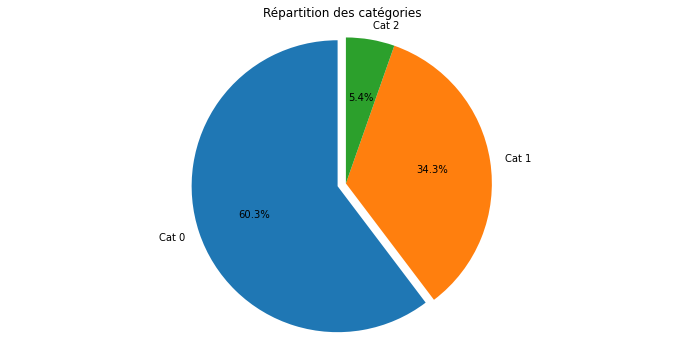

In [135]:
#Pie Chart pour représenter la part de chacune des catégories de vente
# # ==============================================================================
labels = 'Cat 0', 'Cat 1', 'Cat 2'
sizes = tab['f']
explode = (0.06, 0, 0)

fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)

ax1.axis('equal') 
plt.title('Répartition des catégories')

plt.show()

La catégorie 0 est la plus recherchée, avec un peu plus de **60%**, suivie de la catégorie 1 avec un peu plus de **34%** et enfin de la catégorie 2 avec **5,4%**.

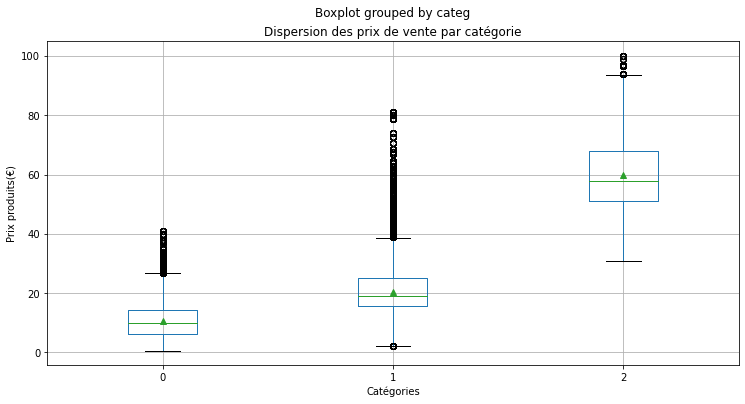

In [136]:
#Comparaison de distribution des prix produits par catégorie avec un boxplot
# # ==============================================================================
subset = df_transactionsv1_products[df_transactionsv1_products.price < 100]
subset.boxplot(column='price', by='categ', showmeans=True, figsize=(12,6))

plt.title('Dispersion des prix de vente par catégorie')
plt.xlabel('Catégories')
plt.ylabel('Prix produits(€)')

plt.show()

La distribution des prix au sein de chacune des catégories n'est pas symétrique puisqu'elle ne présente pas la même forme de part et d’autre du centre de la distribution. 

Nous avons presque une **égalité entre la Moyenne et la Médiane**, mais le **Mode est à chaque fois plus éloigné**.

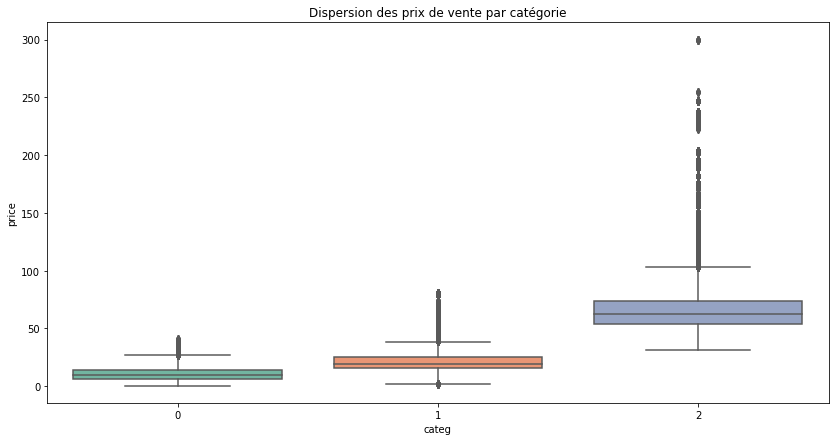

In [150]:
#Autre représentation possible avec Seaborn
# # ==============================================================================
plt.figure(figsize=(14, 7))
sns.boxplot(x = 'categ', y = 'price', data = df_transactionsv1_products, palette="Set2")

plt.title('Dispersion des prix de vente par catégorie')

plt.show()

Les 3 catégories n'ont pas les mêmes types (ou gamme)de produits. La catégorie 2 par exemple a un **prix moyen proche des 60€** avec des outliers en queue de distribution jusqu'à 300€.

>>>### <span style="color:dark green">3.4.1 Analyse des produits disponibles par catégorie

In [78]:
#Comptage des produits présents en catégorie 0
# # ==============================================================================
len(df_products[df_products.categ == 0].groupby('id_prod'))

2308

In [79]:
#Comptage des produits présents en catégorie 1
# # ==============================================================================
len(df_products[df_products.categ == 1].groupby('id_prod'))

739

In [80]:
#Comptage des produits présents en catégorie 2
# # ==============================================================================
len(df_products[df_products.categ == 2].groupby('id_prod'))

239

Une offre produit qui reste cohérente devant les transactions enregistrées, avec visiblement **peu de choix en catégorie 2**.

>> ## <span style="color:dark green">3.5 Analyse sur les profils clients

>>>### <span style="color:dark green">3.5.1 Variable 'birth' (df_transactions_customers)

In [81]:
#Préparation des données.

#Jointure des données transactionnelles et clients (méthode .merge())
# # ==============================================================================
df_transactionsv1_customers = pd.merge(df_transactionsv1, df_customers, on='client_id')
df_transactionsv1_customers.head()

,id_prod,date,session_id,client_id,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986


In [82]:
#Ajout d'une colonne'age' pour faciliter l'analyse
# # ==============================================================================
df_transactionsv1_customers['age'] = 2022 - df_transactionsv1_customers.birth

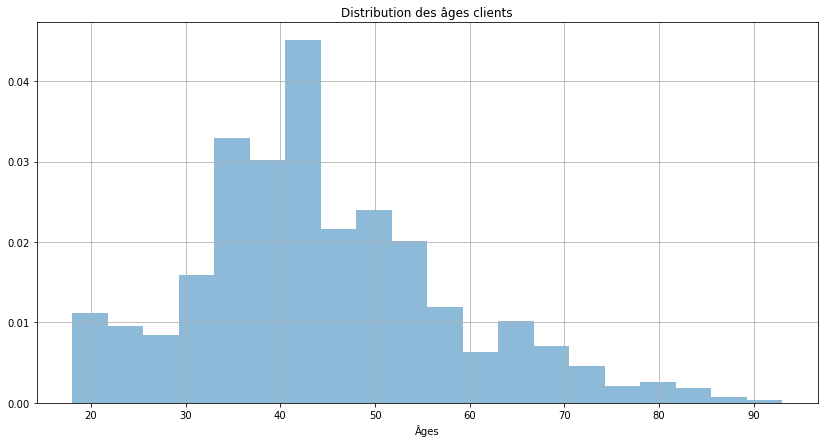

In [151]:
#Visualisation (Histogramme)de la distribution de l'âge clients
# # ==============================================================================
plt.figure(figsize=(14, 7))
df_transactionsv1_customers['age'].hist(density=True, alpha=0.5, bins=20)

plt.xlabel('Âges')
plt.title('Distribution des âges clients')

plt.show()

* La majeure partie des clients se concentrent entre **30 ans et 55 ans**.
* La distrbution des âges ont varié entre **18 ans et 93 ans**.

>>>### <span style="color:dark green">3.5.2 Mesure de concentration des âges clients

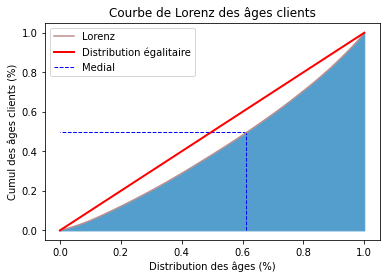

In [84]:
#Courbe de Lorenz sur la variable des âges 
# # ==============================================================================
ages = df_transactionsv1_customers['age'].values

# Sélection du sous-échantillon de travail que l'on appelle ages
#On place les observations dans une variable
# # ==============================================================================
lorenz_ages = np.cumsum(np.sort(ages)) / ages.sum()

#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
# # ==============================================================================
plt.plot(np.linspace(0,1,len(lorenz_ages)), lorenz_ages, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ages)) ,lorenz_ages , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des âges clients')
plt.xlabel("Distribution des âges (%)")
plt.ylabel("Cumul des âges clients (%)")

plt.legend(loc="best")

plt.show()


On constate qu'environ **61%** des âges clients représentent **50%** du montant total des âges. C'est une égalité quasi parfaite, et nous pouvons le confirmer avec l'indice de Gini.

In [85]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
# # ==============================================================================
aire_ss_courbe_age = lorenz_ages[:-1].sum()/len(lorenz_ages) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
# # ==============================================================================
S = 0.5 - aire_ss_courbe_age
gini_age = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_age))

L'indice de Gini est égal à 0.17


Confirmation avec l'indice de Gini très proche de 0, les âges clients sont bien répartis, **quasiment égalitaire** dans notre contexte.

>>>### <span style="color:dark green">3.5.3 Variable 'sex' (df_transactionsv1_customers)

In [86]:
#Méthode .value_counts() pour avoir une idée rapide de la répartition homme/femme chez les clients
# # ==============================================================================
df_transactionsv1_customers['sex'].value_counts()

m    329133
f    327282
Name: sex, dtype: int64

In [87]:
#Préparation des donnée.
#Jointure des données transactionnelles et clients (méthode .merge())
#Préparation des données par jointure pour agréger les valeurs 'customers' avec celles 'transactionsv1_products'
# # ==============================================================================
df = pd.merge(df_customers, df_transactions_products, on='client_id')
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0


In [88]:
#Méthode .pivot_table() pour affiner davantage la répartition des hommes et des femmes selon la catégorie d'achat
#Utilisation de df (étape suivante)obtenu par jointure avec df_customers et df_transactionsv1_products
# # ==============================================================================
fm = df.pivot_table(index='sex', columns='categ', values='price', aggfunc=sum).reset_index()

<Figure size 1008x504 with 0 Axes>

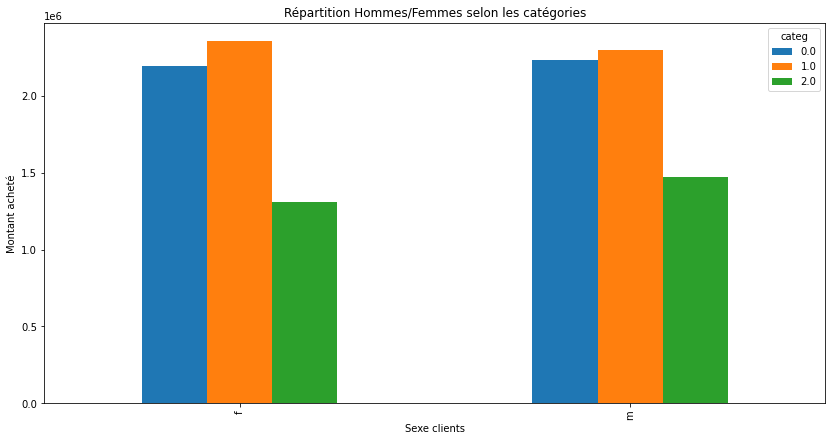

In [154]:

fm.plot(kind='bar', x='sex', figsize=(14, 7))

plt.title('Répartition Hommes/Femmes selon les catégories')
plt.xlabel('Sexe clients')
plt.ylabel('Montant acheté')

plt.show()

L'échantillon étudié ressort avec **une égalité** quasi parfaite **entre les hommes et les femmes**, dans les trois catégories. .

>> ## <span style="color:dark green">3.6 Analyse comportementale des clients 


>>>### <span style="color:dark green">3.6.1 Analyse des transactions par client

In [90]:
#Agrégation des modalités de la variable 'client_id' (méthode .groupby())
#L'objectif est de comprendre l'action de ré-achat (ou non)des clients
# # ==============================================================================
fid_client = df.groupby('client_id').count().reset_index()
fid_client['nb_transac'] = fid_client.session_id
fid_client = fid_client[['client_id', 'nb_transac']]
fid_client.head()

,client_id,nb_transac
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102


In [91]:
#Estimation des clients ayant passés plus d'une commande dans l'année
# # ==============================================================================
fid_client[fid_client['nb_transac'] > 1].shape[0]

8592

In [92]:
#Estimation des clients ayant passés une seule commande dans l'année
# # ==============================================================================
fid_client[fid_client['nb_transac'] == 1].shape[0]

8

In [93]:
#Estimation des clients ayant passés 2 commandes dans l'année
# # ==============================================================================
fid_client[fid_client['nb_transac'] == 2].shape[0]

42

Nous pouvons constater que la plupart de nos clients sont revenus acheter plus d'une fois, nous pouvons donc déterminer que le niveau de fidélité de nos clients est **excellent**.

>>>### <span style="color:dark green">3.4.1 Analyse des centres d'intérêt client : "Catégorie d'affinité"

In [94]:
#Analyse des quantités de produits vendus selon les catéories
# # ==============================================================================
categ_prod = df.groupby('categ').price.count().reset_index()
categ_prod

,categ,price
0,0.0,415680
1,1.0,227169
2,2.0,36483


In [95]:
#Analyse du chiffre d'affaires selon les catégories
# # ==============================================================================
categ_sales = df.groupby('categ').price.sum().reset_index()
categ_sales

,categ,price
0,0.0,4.423588e+06
1,1.0,4.653723e+06
2,2.0,2.780275e+06


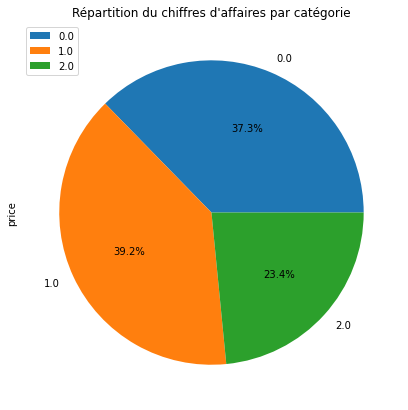

In [164]:
# Chiffre d\'affaires par catégorie
data=df.pivot_table(index='categ', aggfunc={'price': np.sum}).plot(
    kind='pie', y='price',
    legend=True,
    autopct='%1.1f%%',
     figsize=(14, 7)
)
plt.title('Répartition du chiffres d\'affaires par catégorie')
plt.show()

* La catégorie **2 ressort moins populaire** que les deux autres, moins de quantités vendues, moins de chiffre d'affaires.
* En ce qui concerne les catégories 1 et 0, la **différence** entre leurs chiffres est **très faible**.
* L'analyse va se poursuivre sur l'étude des liens éventuels entre les précédentes variables. L'enjeu est de comprendre les corrélations possibles ou non, de manière à pouvoir tirer des conclusions qui mènera l'entreprise à prendre des décisions stratégiques.

> # <span style="color:dark green">4 Comportement de nos clients en ligne (demandé par Julie)

>> ## <span style="color:dark green">4.1 Préparation des données : Jointure des 3 dataframes

Il est judicieux, pour plus compréhension, d'ajouter une colonne 'age'.

In [96]:
#Utilisation du dataframe df résultant de la jointure de df_customers, df_transactionsv1_products
# # ==============================================================================
df['age'] = 2022 - df.birth

In [97]:
#Visualisation rapide des catégories de df
# # ==============================================================================
df.dtypes

client_id             object
sex                   object
birth                  int64
id_prod               object
date          datetime64[ns]
session_id            object
price                float64
categ                float64
age                    int64
dtype: object

In [98]:
#Visualisation rapide de dataframe df
# # ==============================================================================
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


>>> ## <span style="color:dark green"> 4.1.2 Première approche des corrélations sur l'ensemble de nos variables numériques

In [99]:
#Utilisation de la méthode .corr()
# # ==============================================================================
df.corr().head()

,birth,price,categ,age
birth,1.000000,0.209443,0.099222,-1.000000
price,0.209443,1.000000,0.671692,-0.209443
categ,0.099222,0.671692,1.000000,-0.099222
age,-1.000000,-0.209443,-0.099222,1.000000


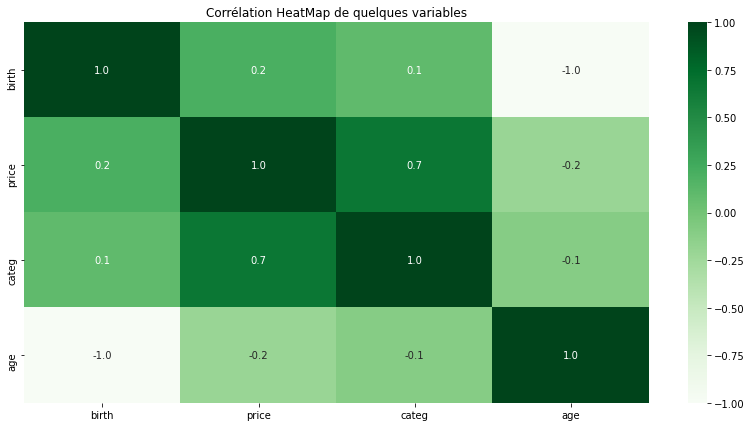

In [167]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
# # ==============================================================================
plt.figure(figsize=(14, 7))
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Greens', )
plt.title('Corrélation HeatMap de quelques variables')

plt.show()

Immédiatement, nous pouvons remarquer certaines choses : Diagonalement, de haut en bas, de gauche à droite, vous pouvez voir une **corrélation parfaite 1** comparant une paire à elle-même. Vous verrez toujours ceci dans chaque tableau : plus un nombre est vert foncé, plus ce nombre est proche de 1, ce qui spécifie une corrélation positive (les prix produits / catégories se rapprochent l'une de l'autre).

Plus un nombre est moins foncé, plus ce nombre est proche de -1. Ceci spécifie une **corrélation négative**



>> ## <span style="color:dark green"> 4.2 Analyse de la corrélation entre le sexe des clients et les catégories de produits achetés

>>> ### <span style="color:dark green"> 4.2.1 Création du tableau de contingence "Matrice des valeurs observées"
   * On pivote, on remplit les NaN, on calcule la ligne Total et la colonne Total.
   * Ce tableau nous sera également utile pour la partie 2, car c'est cela qui est attendu en entrée par la méthode
    de scipy.stats que l'on utilisera.

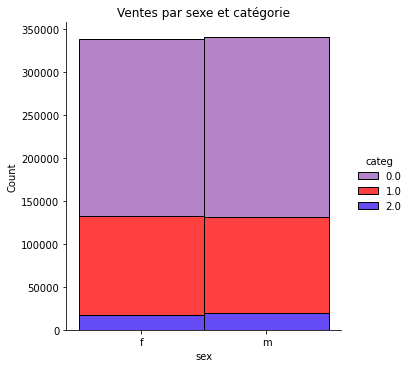

In [165]:
#Variables 'sex' et 'categ' du dataframe df
# # ==============================================================================
X = 'sex'
Y = 'categ'

#Calcul du tableau de contigence par la méthode .pivot_table()
c = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) ###, margins=True, margins_name='Total'
tx = df[X].value_counts()
ty = df[Y].value_counts()

#Création d'une copie du dataframe original
cont = c.copy()
cont

sns.displot(data=df, x='sex', hue='categ', multiple="stack", palette = ["#9b59b6", "#ff0000",  "#320ff0"])
plt.title('Ventes par sexe et catégorie')
plt.show()

Les ventes réalisées pour chaque genre sont assez similaires.
Si l'on regarde plus en détail les **catégories 0 et 2**, on constate une préférence légèrement plus marquée pour les hommes que pour les femmes et si nous regardons la **catégorie 2**, on constate que les femmes sont légèrement plus nombreuses que les hommes à acheter ces articles.

>>> ### <span style="color:dark green"> 4.2.2 Création de la "Matrice des valeurs attendues"

In [103]:
#L’occurrence attendue est simplement la fréquence que l’on devrait trouver dans une cellule 
#si l’hypothèse nulle était vraie.
# # ==============================================================================
tx_df= pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ["s"]
ty_df.columns = ["s"]

#Valeurs totales observées
n = len(df)

#Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df.dot(ty_df.T) / n)
indep

,0.0,1.0,2.0
m,208613.435551,114007.182306,18309.382143
f,207066.564449,113161.817694,18173.617857


>>> ### <span style="color:dark green"> 4.2.3 Calcul de la matrice "écart au carré normalisé de la valeur attendue VS valeur observée"

In [104]:
#Calcul de la matrice
# # ==============================================================================
mesure = (c-indep)**2/indep
mesure

categ,0.0,1.0,2.0
f,3.461068,26.668027,43.645694
m,3.435404,26.470283,43.322061


>>> ### <span style="color:dark green"> 4.2.4 Calcul du Chi2
Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) 
 avec les occurrences attendues.


In [105]:
#Somme des valeurs de la précédente matrice. 
# # ==============================================================================
chi2 = mesure.sum().sum()
chi2

147.00253568681114

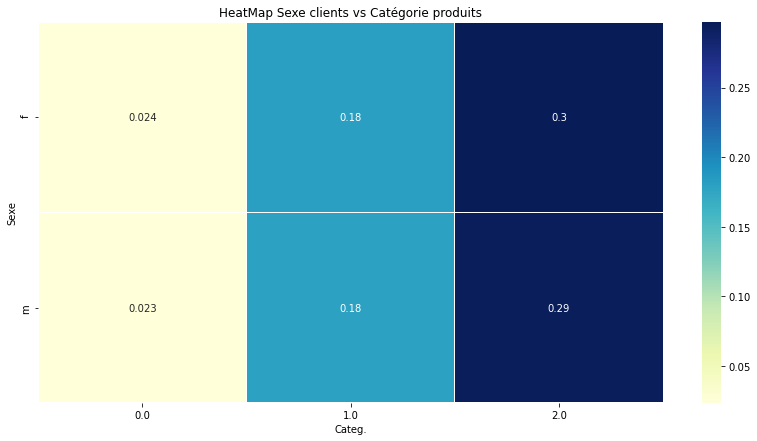

In [168]:
#HeatMap 
table = (mesure/chi2)
plt.figure(figsize=(14, 7))
sns.heatmap(table, annot=True, cmap="YlGnBu", linewidths=0.1)

plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.xlabel('Categ.')
plt.ylabel('Sexe')

plt.show()

Le test de Chi2 est utilisé pour tester l'hypothèse nulle (H0) **d'absence de relation entre deux variables catégorielles**, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

La valeur de Chi2 est une quantification de cet écart (entre les occurences attendues et celles observées). **Plus la valeur sera élevée, plus l'écart entre l'hypothèse nulle et la situation réelle sera grand**.

Plus l’occurrence observée est près de l’occurrence attendue, **plus la fraction calculée pour chaque cellule est petite et moins l’écart avec H0 est grand**.

>>> ### <span style="color:dark green"> 4.2.5 Calcul du chi2 et de la p-value à partir de la matrice des valeurs observées avec scipy

In [107]:
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
# # ==============================================================================
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(147.00253568681114, 2, 1.1989607410166063e-32)

L'indice élevé du Chi2 démontre une importance significative entre les occurences théoriques et celles du tableau de contigence. De plus, la comparaison de **p-value (1e-26%)** avec notre seuil de significativité (traditionnellement 5%) expose une **valeur inférieure au seuil**. L'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il **existe donc un lien entre le sexe des clients et les catégories produits**.

>> ## <span style="color:dark green"> 4.3 Analyse de la corrélation entre l'âge clients et le montant total des achats
    >>> ### <span style="color:dark green"> 4.3.1 Agrégation pour sommer les ventes 'price' (produits achetés) en fonction de l'âge des clients
    >>>> ### <span style="color:dark green"> 4.3.1.1 Création d'une variable 'age_price'

In [108]:
#variable 'age_price'
# # ==============================================================================
age_price = df.groupby('age').sum().reset_index()
age_price = age_price[['age', 'price']].sort_values(by='age', ascending=False) 
#Valeurs exprimées en K€
age_price['price'] = age_price['price'] / 1000 

#Apperçu des données âges / ventes
age_price.head() 

,age,price
75,93,3.221850
74,92,4.013870
73,91,2.815450
72,90,5.043190
71,89,5.271805


In [109]:
age_price.tail()

,age,price
4,22,165.042890
3,21,178.497700
2,20,184.229714
1,19,178.195780
0,18,609.013690


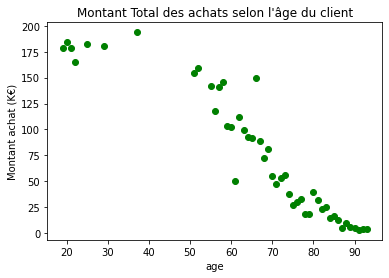

In [110]:
#Visualisation avec un scatterplot (âge clients vs montant total des achats)
# # ==============================================================================
plt.plot(age_price[age_price.price < 200].age, age_price[age_price.price < 200].price, 'o', color='green')

plt.xlabel('age')
plt.ylabel('Montant achat (K€)')
plt.title('Montant Total des achats selon l\'âge du client')

plt.show()

   >>>> ### <span style="color:dark green"> 4.3.2 Achats selon l'âge du client

  >>>> ### <span style="color:dark green"> 4.3.3 Coefficient de corrélation linéaire de Pearson

In [111]:
#Coefficient de corrélation 
# # ==============================================================================
coef_age_price = st.pearsonr(age_price.age, age_price.price)[0]
coef_age_price

-0.7788469792269999

* Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que **plus les consommateurs sont agés plus le montant total de leur achat est faible**. Or le coefficient est plus proche de -1 que de zéro. 
* Par conséquent, **on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible**.(forte correlation)
* Le pic d'achat se situe entre **18 et 38 ans**. 
* On observe un **pic anormal** dans la tranche d'âge de 18 ans.

>> ## <span style="color:dark green"> 4.4 Analyse de la corrélation entre l'âge clients et la fréquence d'achat


Ici la fréquence d'achat correspond au nombre d'achats par mois

In [112]:
#Analyse faite à partir du dataframe global df
# # ==============================================================================
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


>>> ### <span style="color:dark green"> 4.4.1 Agrégation des données selon l'âge client

Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois

In [113]:
#Hypothèse 1 id_session = 1 transation
# # ==============================================================================
customers_freq = df.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]

#Création d'une variable fréquence 'f'
# # ==============================================================================
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,f
75,93,201,0.000296
74,92,226,0.000333
73,91,170,0.000250
72,90,311,0.000458
71,89,327,0.000481
70,88,555,0.000817
69,87,272,0.000400
68,86,757,0.001114
67,85,942,0.001387
66,84,834,0.001228


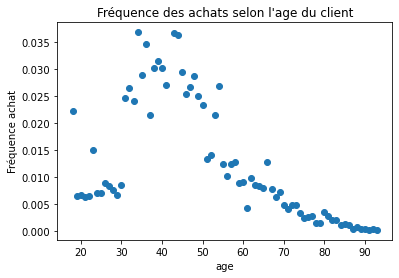

In [114]:
#Visualisation avec un scatterplot (âge client vs fréquence d'achat mensuelle)
#customers_freq.plot.scatter(x = 'age', y = 'f', marker = 'o', color='purple')
# # ==============================================================================
plt.plot(customers_freq[customers_freq.f < .05].age, customers_freq[customers_freq.f < .05].f, 'o')

plt.xlabel('age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')

plt.show()

 >>>> ### <span style="color:dark green"> 4.4.2 Coefficient de corrélation linéaire de Pearson

In [115]:
#Coefficient de corrélation linéaire de Pearson
# # ==============================================================================
coef_customers_freq = st.pearsonr(customers_freq.age, customers_freq.f)[0]
coef_customers_freq

-0.5337045762407476

* Corrélation confirmée par le coefficient de Pearson, il **existe bien un lien entre l'âge des clients et leurs fréquences d'achat**. 
* La tranche d'âge des **30 et 50 ans** est celle qui achète le plus fréquemment.
* On constate à nouveau un pic chez les jeunes de **18 ans**, cette fois dans la fréquence d'achat selon l'âge.

>> ## <span style="color:dark green"> 4.5 Analyse de la corrélation entre l'âge clients et la taille du panier moyen

Ici la taille du panier moyen sera exprimée en nombre d'articles

In [116]:
#Analyse faite à partir du dataframe global df
# # ==============================================================================
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


>>> ### <span style="color:dark green"> 4.5.1 Les agrégations 

In [117]:
#Première agrégation selon l'age client et les sessions en comptage de modalités
# # ==============================================================================
customers_shop = df.groupby(['age', 'session_id']).count().reset_index()

#Seconde agrégation selon l'age client en moyenne de produits achetés 
customers_shop = customers_shop.groupby('age').mean().reset_index()
customers_shop = customers_shop[['age', 'id_prod']]
customers_shop.tail()

,age,id_prod
71,89,1.397436
72,90,1.509709
73,91,1.770833
74,92,1.547945
75,93,1.500000


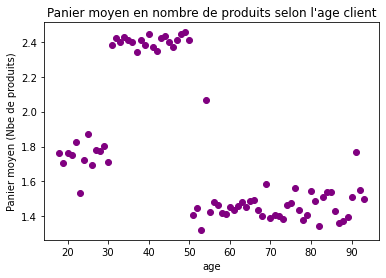

In [118]:
#Visualisation avec un scatterplot (âge client vs taille panier moyen)
# # ==============================================================================
plt.plot(customers_shop.age, customers_shop.id_prod, 'o', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.show()

>>> ### <span style="color:dark green"> 4.5.2 Identifier les clusters clients

In [119]:
#Subsets pour identifier les clusters clients 
# # ==============================================================================
customers_shop31 = customers_shop[customers_shop.age < 31]
customers_shop3050 = customers_shop[(customers_shop.age > 31) & (customers_shop.age < 50)]
customers_shop50 = customers_shop[customers_shop.age > 51]

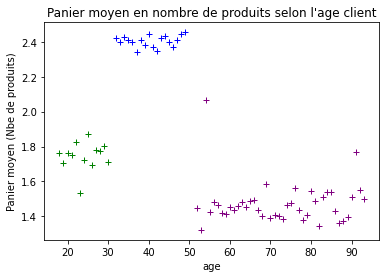

In [120]:
#Visualisation avec scatterplot selon les groupes d'individus identifiés
# # ==============================================================================
plt.plot(customers_shop31.age, customers_shop31.id_prod, '+', color='green')
plt.plot(customers_shop3050.age, customers_shop3050.id_prod, '+', color='blue')
plt.plot(customers_shop50.age, customers_shop50.id_prod, '+', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.show()

>>> ### <span style="color:dark green"> 4.5.3 Coefficient de corrélation linéaire de Pearson

In [121]:
#Coefficient de corrélation linéaire de Pearson
# # ==============================================================================
coef_customers_shop = st.pearsonr(customers_shop.age, customers_shop.id_prod)
coef_customers_shop 

(-0.5738876097284992, 5.977096246666381e-08)

* Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. Par exemple, sur les individus de plus de **50 ans, le panier moyen reste faible**. 
* Il existe également un lien sur les individus de **18 à 30 ans et de 30 à 50 ans**. La linéarité de la corrélation existe mais selon des corpus de clients **visiblement distincts**, par tranches d'âges.

>> ## <span style="color:dark green"> 4.6 Analyse de la corrélation entre l'âge clients et la catégorie produits

Afin de simplifier l'analyse, il est nécessaire de procéder par un découpage en classes (discrétisation). Donc très clairement le but est de pouvoir réduire nos individus "âges" par classes, de manière à pouvoir interpréter plus facilement les résultats.

>>> ### <span style="color:dark green"> 4.6.1 Discrétisation de classes
    
**Comment choisir le nombre de classes?**

Soit k le nombre de classe à découper et N la population.

* Formule de Sturges-Huntsberger : k = 1 + 3.33*log(N,base=10)

* Formule Brooks-Carruthers : k = 5*log(N,base=10)

>>>> #### <span style="color:dark green"> 4.6.1.1 N est le nombre d'observations, ici représentées par les valeurs transactionnelles par âge et par catégorie

In [122]:
#N représentées par les valeurs transactionnelles par âge et par catégorie
# # ==============================================================================
len(df.groupby(['age', 'categ']).count().reset_index())

228

>>>> #### <span style="color:dark green"> 4.6.1.2 Formule de Huntsberger

In [123]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
# # ==============================================================================
1 + ((10/3) * mth.log10(227))

8.853419523977076

>>>> #### <span style="color:dark green"> 4.6.1.3 Formule de Brooks-Carruthers

In [124]:
#Formule de Brooks-Carruthers : 5*log10(N)
# # ==============================================================================
5 * mth.log10(227)

11.780129285965613

Dans notre contexte, nous pouvons retenir un nombre de classes de 9.

In [125]:
#Méthode .groupby() pour agréger les données selon l'âge et la catégorie
# # ==============================================================================
age_categ = df.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]
age_categ.head()

,age,categ,session_id
0,18,0.0,3418
1,18,1.0,5719
2,18,2.0,6012
3,19,0.0,909
4,19,1.0,1678


In [126]:
#Méthode .cut() pour créer les 9 groupes d'âges, une segmentation des individus 'age'
# # ==============================================================================
age_categ['age']= pd.cut(age_categ['age'], 9)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()
age_categ.head(10)

,age,categ,session_id
0,"(17.925, 26.333]",0.0,12041
1,"(17.925, 26.333]",1.0,21906
2,"(17.925, 26.333]",2.0,24694
3,"(26.333, 34.667]",0.0,62904
4,"(26.333, 34.667]",1.0,25576
5,"(26.333, 34.667]",2.0,8810
6,"(34.667, 43.0]",0.0,160818
7,"(34.667, 43.0]",1.0,49330
8,"(34.667, 43.0]",2.0,714
9,"(43.0, 51.333]",0.0,104486


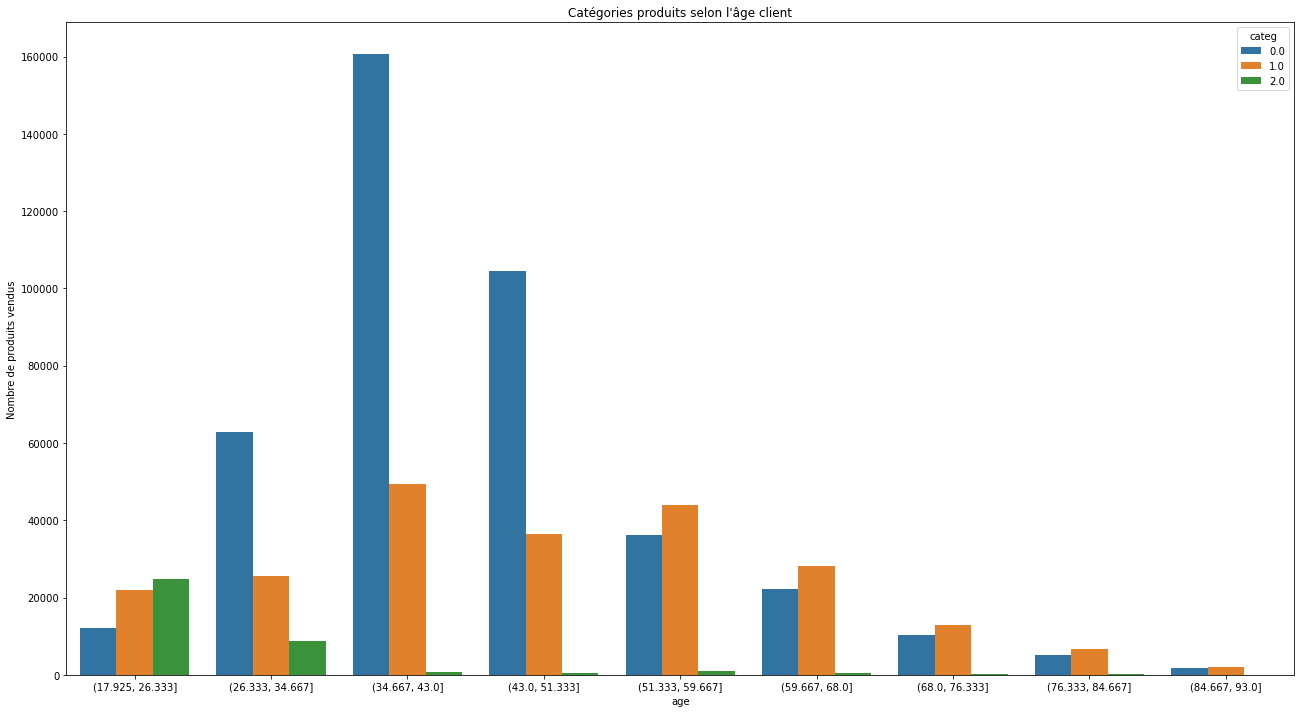

In [127]:
#Visualisation rapide avec une BarPlot Seaborn
# # ==============================================================================
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=age_categ)

ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits selon l\'âge client')

plt.show()

In [128]:
#Coefficient de corrélation eta carré
# # ==============================================================================
X = "categ" #qualitative
Y = "age" #quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [129]:
round(eta_squared(age_categ.age, age_categ.session_id), 2)

0.35

* Le rapport de corrélation **est proche de 0.40**, ce qui précise le précédent graphique dans lequel une certaine **corrélation entre les catégories et l'âge client**. 
* Il est perceptible de voir le lien que peut avoir une catégorie en fonction d'une tranche d'âges, avec par exemple un **fort succès de la catégorie 0 pour les 34 / 44 ans**, ou à l'inverse une clientèle plus âgée n'adhère quasiment pas à cette catégorie, etc..

* Le 39% de la C.A. est générée par la catégorie 1.
* Les transactions les plus nombreuses et celles qui génèrent le plus de C.A. sont effectuées par les 35 à 45 ans.
* Les ventes par sexe et par catégorie ont des comportements très similaires.
* Les montants d'achat les plus notables, selon l'âge du client, se situent dans les tranches d'âge de 18 et 38 ans.
* Les achats les plus fréquents sont effectués par les 30 et 50 ans.


Recommandations :

* Explorez davantage la clientèle professionnelle, qui semble avoir une grande marge de progression.
* Maintenir et renouveler l'offre aux clients les plus jeunes qui sont les plus habitués à ce type de commerce en ligne.
* Mettez en place une stratégie pour le groupe d'âge qui n'est pas tellement habitué au commerce en ligne.
* Être à jour sur les nouvelles tendances afin de maintenir la parité des achats de notre clientèle masculine et féminine.